Connecting collab with my Google-drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing important libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# Loading csv file from G-drive

df=pd.read_csv("drive/My Drive/Fraud dataset/Fraud.csv")

In [ ]:
# Loading csv file from System Folder

df=pd.read_csv("Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


### **Analizing & Visualizing Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398,0.001,0.000
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942,0.036,0.002
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440,0.000,0.000
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250,0.000,0.000
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,1.000,1.000


In [8]:
df.shape

(6362620, 11)

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
df['isFraud'].unique() 

array([0, 1])

In [13]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [14]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

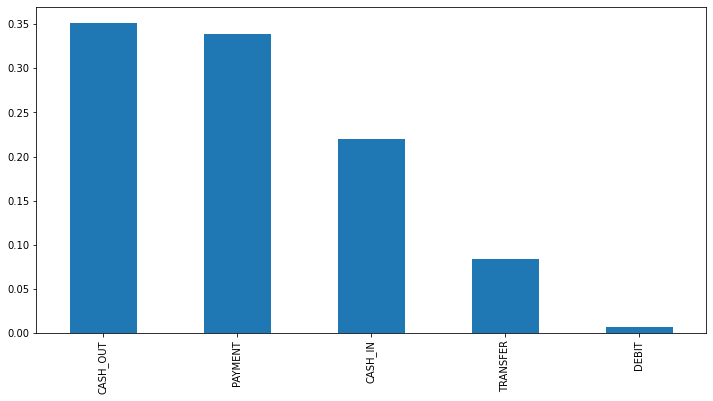

In [15]:
plt.figure(figsize=[12,6])
df.type.value_counts(normalize=True).plot.bar()
plt.show()

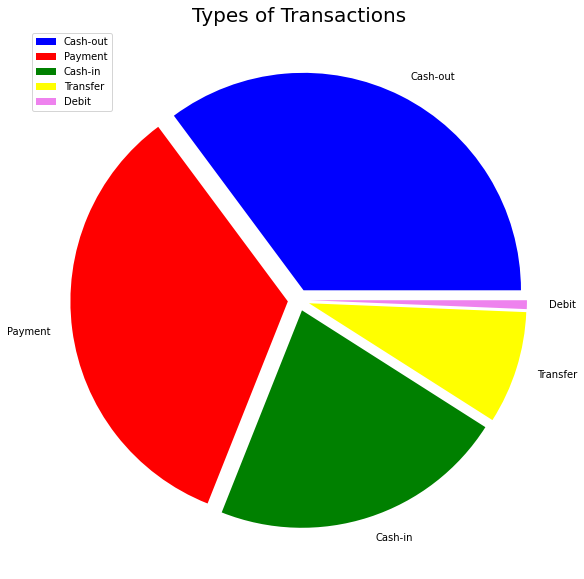

In [16]:
# Pie Chart for Transactions types

labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
colors = ['Blue', 'Red', 'Green', 'Yellow', 'Violet']
size = [2237500, 2151495, 1399284, 532909, 41432]
explode = [0.05, 0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=[10,10])
plt.pie(size, colors = colors, labels = labels, shadow = False, explode = explode,)
plt.title('Types of Transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [17]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [18]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

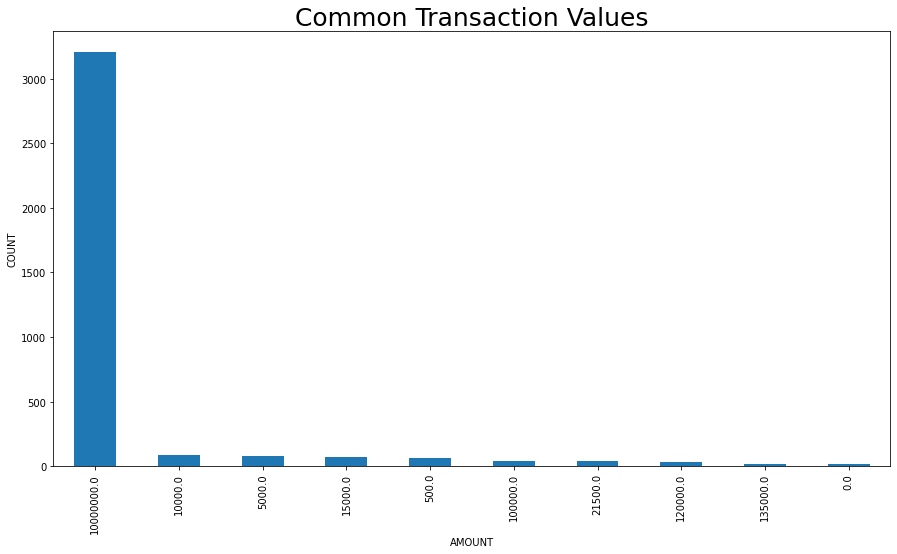

In [19]:
plt.figure(figsize=[15,8])
df.amount.value_counts().head(10).plot.bar()
plt.title('Common Transaction Values', fontsize = 25)
plt.xlabel('AMOUNT')
plt.ylabel('COUNT')
plt.show()

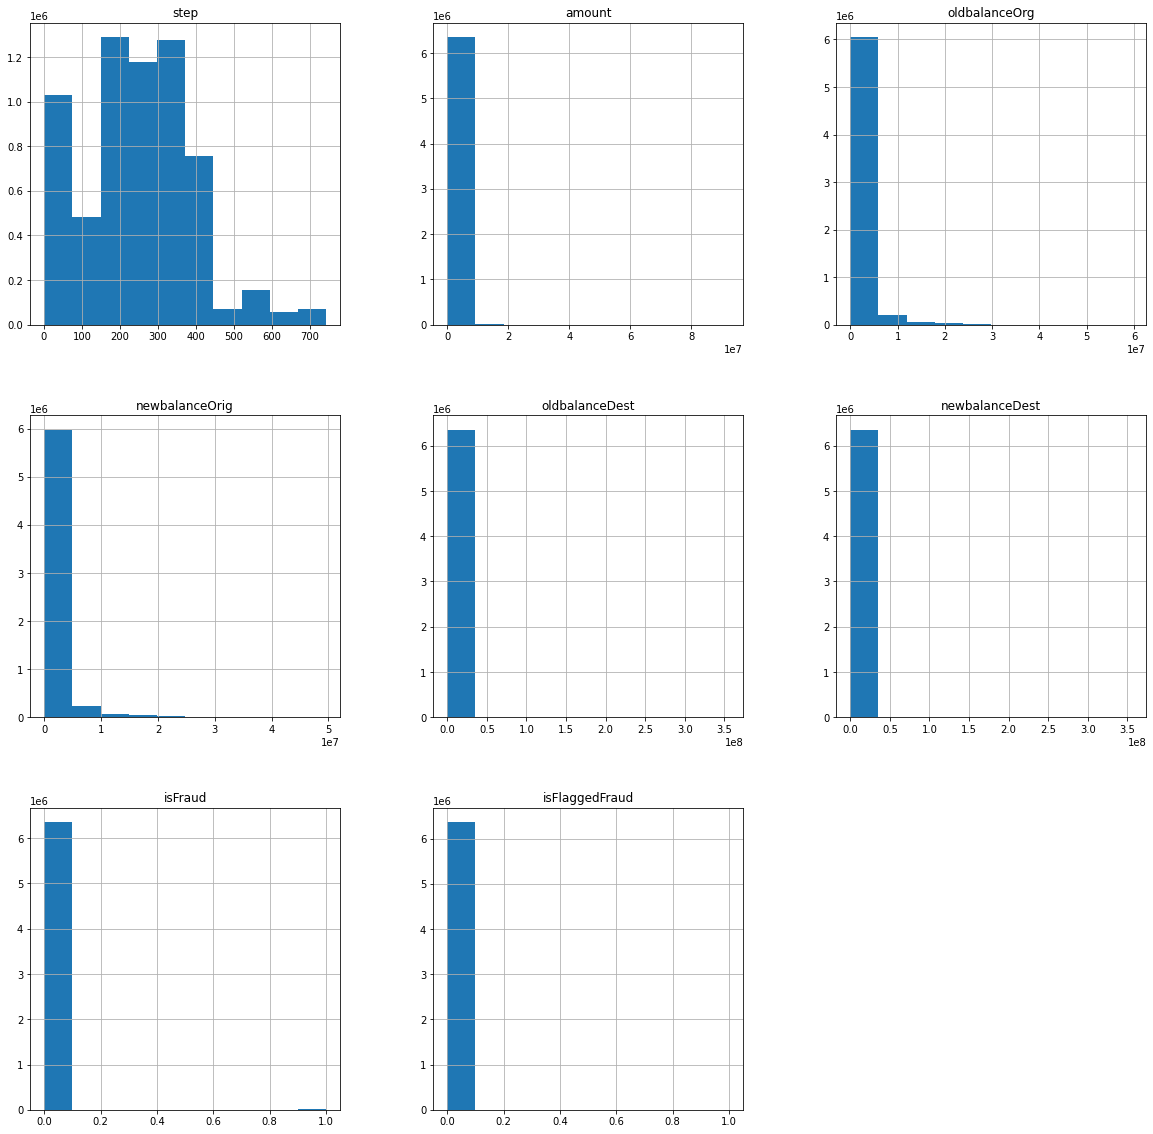

In [20]:
#Plotting the data distribution plots
p = df.hist(figsize = (20,20))

In [21]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [22]:
max(df.amount)

92445516.64

In [23]:
min(df.amount)

0.0

In [24]:
df.amount.describe()

count    6362620.000
mean      179861.904
std       603858.231
min            0.000
25%        13389.570
50%        74871.940
75%       208721.478
max     92445516.640
Name: amount, dtype: float64

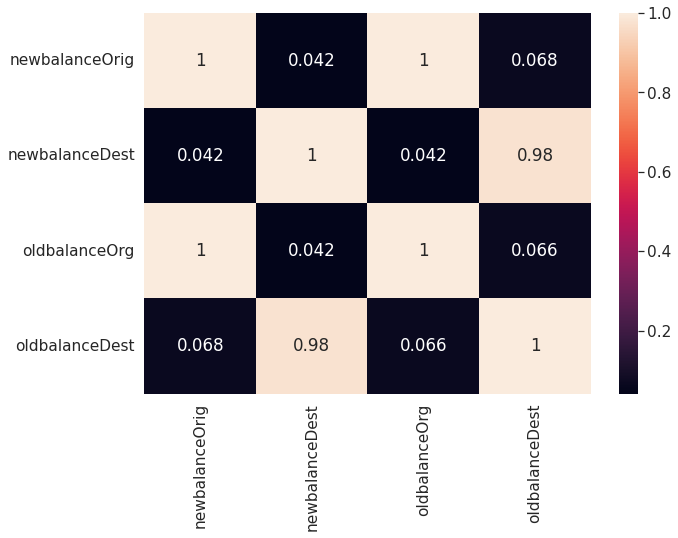

In [74]:
fig, ax = plt.subplots(figsize=(10,7))     
sns.set(font_scale=1.4)
sns.heatmap(data=df[['newbalanceOrig','newbalanceDest','oldbalanceOrg','oldbalanceDest']].corr(),annot=True, ax=ax)
plt.show()

In [26]:
# 10 Transactions of type= TRANSFER 

df[df['type'] == 'TRANSFER'].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
175329,12,TRANSFER,1639813.490,C280977815,0.000,0.000,C1346571442,2264321.550,3921745.560,0,0
773899,39,TRANSFER,59141.230,C1339356939,0.000,0.000,C1755804881,1733203.750,1792344.990,0,0
4259805,306,TRANSFER,5390758.910,C1013089424,0.000,0.000,C657175157,21578901.390,26969660.300,0,0
5157528,357,TRANSFER,1324299.430,C2081733227,0.000,0.000,C446002180,3938816.290,5263115.720,0,0
5409226,378,TRANSFER,345682.540,C888842111,9534.000,0.000,C197616569,0.000,345682.540,0,0
811550,40,TRANSFER,568675.130,C246804434,37273.200,0.000,C1002362253,1320925.060,1889600.190,0,0
1808329,163,TRANSFER,576428.030,C337747482,7007.000,0.000,C463643727,126983.280,703411.310,0,0
5509992,380,TRANSFER,589487.240,C1982292170,0.000,0.000,C1902314200,3521582.650,4111069.890,0,0
4406156,321,TRANSFER,449216.430,C1555565727,0.000,0.000,C1470642329,827062.570,1276279.000,0,0
1046143,95,TRANSFER,174112.300,C2115689613,240976.000,66863.700,C60584787,0.000,174112.300,0,0


In [27]:
# 10 Transactions of type= CASH_OUT 

df[df['type'] == 'CASH_OUT'].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3657340,275,CASH_OUT,93109.810,C1888953235,0.000,0.000,C1120994580,322728.330,415838.140,0,0
676792,36,CASH_OUT,47531.050,C143191856,0.000,0.000,C842020437,231353.300,278884.350,0,0
1901813,165,CASH_OUT,131214.120,C569198951,0.000,0.000,C801503327,196002.910,327217.040,0,0
3082423,235,CASH_OUT,233035.940,C1266927970,11244.000,0.000,C2047087507,1507074.280,1740110.220,0,0
5892932,403,CASH_OUT,260476.490,C560566982,16774.000,0.000,C1115432329,111922.140,372398.640,0,0
2856242,227,CASH_OUT,284056.310,C212303511,72225.000,0.000,C1697258007,16807519.800,17091576.110,0,0
1683720,159,CASH_OUT,58402.170,C704564991,31540.000,0.000,C730738506,92576.000,150978.170,0,0
1694133,159,CASH_OUT,235343.650,C1133990792,0.000,0.000,C526759739,2254653.680,2489997.330,0,0
2112872,183,CASH_OUT,308751.190,C798461973,96662.000,0.000,C746629891,232755.640,541506.830,0,0
5810623,401,CASH_OUT,152572.120,C2111528125,31968.000,0.000,C1870497909,951222.120,1103794.240,0,0


In [28]:
# 10 Transactions of type= TRANSFER and are termed Fraud

df[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)].sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6351057,696,TRANSFER,44044.790,C840857519,44044.790,0.000,C227745281,0.000,0.000,1,0
2537919,205,TRANSFER,96640.120,C1573553725,96640.120,0.000,C74177098,0.000,0.000,1,0
1927547,168,TRANSFER,7513581.460,C1185526711,7513581.460,0.000,C342454180,0.000,0.000,1,0
141634,11,TRANSFER,313418.280,C711446907,313418.280,0.000,C888769567,0.000,97980.880,1,0
6266211,614,TRANSFER,281087.010,C745740843,281087.010,0.000,C2110645655,0.000,0.000,1,0
1059570,105,TRANSFER,2988103.300,C257797783,2988103.300,0.000,C1647613503,0.000,0.000,1,0
1059668,115,TRANSFER,530377.280,C1741821297,530377.280,0.000,C182731485,0.000,0.000,1,0
6032487,474,TRANSFER,1165171.470,C107566089,1165171.470,0.000,C956043310,0.000,0.000,1,0
5987916,410,TRANSFER,950791.370,C1316033338,950791.370,0.000,C137391139,0.000,0.000,1,0
2973346,231,TRANSFER,13962.000,C778909639,13962.000,0.000,C1475228606,0.000,0.000,1,0


In [29]:
df[df['isFraud'] == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [30]:
# Maximum amount of fraud 'TRANSFER' transaction.

df[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)].amount.max()

10000000.0

In [31]:
# Minimum amount of fraud 'TRANSFER' transaction.

df[(df['type'] == 'TRANSFER') & (df['isFraud'] == 1)].amount.min()

63.8

In [32]:
# Maximum amount of fraud 'CASH_OUT' transaction.

df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)].amount.max()

10000000.0

In [33]:
# Minimum amount of fraud 'CASH_OUT' transaction.

df[(df['type'] == 'CASH_OUT') & (df['isFraud'] == 1)].amount.min()

0.0

### **Creating a new DataFrame**

*From here on we work on the dataframe where transaction-type is either 'TRANSFER' or 'CASH_OUT'* as our analysis show that Fraud is committed on these two transaction types.

In [34]:
# new_df is the new Dataframe where transaction type is 'TRANSFER' & 'CASH_OUT'

new_df = df[(df['type'] =='CASH_OUT') | (df['type'] == 'TRANSFER') ]

In [35]:
new_df.shape

(2770409, 11)

In [36]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
15,1,CASH_OUT,229133.940,C905080434,15325.000,0.000,C476402209,5083.000,51513.440,0,0
19,1,TRANSFER,215310.300,C1670993182,705.000,0.000,C1100439041,22425.000,0.000,0,0
24,1,TRANSFER,311685.890,C1984094095,10835.000,0.000,C932583850,6267.000,2719172.890,0,0


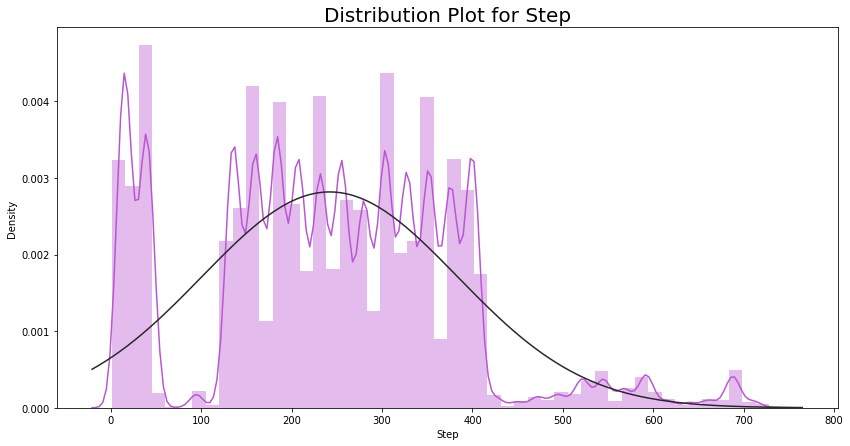

In [37]:
plt.figure(figsize=[14,7])
sns.distplot(new_df.step, kde = True, color='mediumorchid', fit = norm )
plt.title('Distribution Plot for Step', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

In [38]:
# Transactions where old and new balance is equal and are termed as fraud

new_df[(new_df['isFraud'] == 1) & (new_df['oldbalanceOrg'] == new_df['newbalanceOrig'])].head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.330,C749981943,0.000,0.000,C667346055,102.000,9291619.620,1,0
14861,8,CASH_OUT,181728.110,C2102265902,0.000,0.000,C789014007,11397.000,184477.770,1,0
25875,8,TRANSFER,1078013.760,C1026280121,0.000,0.000,C277510102,0.000,970749.680,1,0
77745,10,CASH_OUT,277970.880,C489647033,0.000,0.000,C571514738,0.000,277970.880,1,0
138559,11,TRANSFER,1933920.800,C1706582969,0.000,0.000,C461905695,1283762.850,3217683.650,1,0


In [39]:
# Transactions where old and new balance is equal and are termed as not fraud

new_df[(new_df['isFraud'] == 0) & (new_df['oldbalanceOrg'] == new_df['newbalanceOrig'])].head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.890,C512549200,0.000,0.000,C248609774,652637.000,6453430.910,0,0
79,1,TRANSFER,77957.680,C207471778,0.000,0.000,C1761291320,94900.000,22233.650,0,0
80,1,TRANSFER,17231.460,C1243171897,0.000,0.000,C783286238,24672.000,0.000,0,0
81,1,TRANSFER,78766.030,C1376151044,0.000,0.000,C1749186397,103772.000,277515.050,0,0
82,1,TRANSFER,224606.640,C873175411,0.000,0.000,C766572210,354678.920,0.000,0,0


Key Factor to predict a fraudulent transaction is invalid account balance after the transactions.
As, 'CASH_OUT' transaction is being conducted over empty accounts & sometimes amount withrawn is much less than the the amount mentioned in transaction receipt.
'TRANSFER' transactions are being done over accounts whose net balance are always either zero or remain same.

In [40]:
# Dropping 2 columns of 'customer who started the transaction' and 'customer who is the recipient of the transaction'
new_df.drop(['nameOrig', 'nameDest'], axis = 1, inplace=True)

In [41]:
# Difference between initial balance before the transaction and new balance after the transaction
new_df['balanceOrig'] = new_df['newbalanceOrig'] - new_df['oldbalanceOrg'] + new_df['amount'] 

# Difference between initial balance recipient before the transaction and new balance recipient after the transaction
new_df['balanceDest'] = new_df['newbalanceDest'] - new_df['oldbalanceDest'] + new_df['amount'] 

In [42]:
new_df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig,balanceDest
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1,0,0.000,181.000
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1,0,0.000,-21001.000
15,1,CASH_OUT,229133.940,15325.000,0.000,5083.000,51513.440,0,0,213808.940,275564.380
19,1,TRANSFER,215310.300,705.000,0.000,22425.000,0.000,0,0,214605.300,192885.300
24,1,TRANSFER,311685.890,10835.000,0.000,6267.000,2719172.890,0,0,300850.890,3024591.780


In [43]:
# Label Encoding for transaction type
new_df['type'].replace('TRANSFER', 0, inplace = True)
new_df['type'].replace('CASH_OUT', 1, inplace = True)

In [44]:
new_df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig,balanceDest
2,1,0,181.000,181.000,0.000,0.000,0.000,1,0,0.000,181.000
3,1,1,181.000,181.000,0.000,21182.000,0.000,1,0,0.000,-21001.000
15,1,1,229133.940,15325.000,0.000,5083.000,51513.440,0,0,213808.940,275564.380
19,1,0,215310.300,705.000,0.000,22425.000,0.000,0,0,214605.300,192885.300
24,1,0,311685.890,10835.000,0.000,6267.000,2719172.890,0,0,300850.890,3024591.780


In [ ]:
plt.figure(figsize=(6,2))
sns.histplot(new_df[new_df['type'] == 0]['amount'])
sns.histplot(new_df[new_df['type'] == 1]['amount'],color='red',)

In [46]:
# Preparing data for model training by separating feature values and target.

y = new_df['isFraud']
x = new_df.drop(['isFraud'], axis = 1)

In [47]:
y.shape

(2770409,)

In [48]:
x.shape

(2770409, 10)

In [49]:
#split the dataset into 20% test data and 80% train data.
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
print("Shape of xtrain: ", xtrain.shape)
print("Shape of ytrain: ", ytrain.shape)

Shape of xtrain:  (2216327, 10)
Shape of ytrain:  (2216327,)


In [51]:
print("Shape of xtest: ", xtest.shape)
print("Shape of ytest: ", ytest.shape)

Shape of xtest:  (554082, 10)
Shape of ytest:  (554082,)


In [52]:
#perform the standard scaling on data.

from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [53]:
# transform both the training and test data of input.

std_train=std.fit_transform(xtrain)
std_test=std.transform(xtest)

In [54]:
#Check the dimensions of std_train
std_train.shape

(2216327, 10)

In [75]:
#Check the dimensions of std_test
std_test.shape

(554082, 10)

**Importing all major Machine Learning Models**

In [55]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Importing Metrics for tracking model performances**

In [56]:
from sklearn.metrics import precision_score, classification_report, average_precision_score, accuracy_score

In [57]:
lrc = LogisticRegression()
xgb = XGBClassifier()
rfc = RandomForestClassifier(n_estimators=5, random_state=0)
dtc = DecisionTreeClassifier(max_depth=5)
abc = AdaBoostClassifier(n_estimators=10, random_state=2)
bc = BaggingClassifier(n_estimators=10, random_state=2)
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()

In [58]:
clfs = {
    'LR': lrc, 
    'RF': rfc, 
    'xgb':xgb,
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
    
}

Function for 

In [59]:
def train_classifier(clf,std_train,ytrain,std_test,ytest):
    clf.fit(std_train,ytrain)
    y_pred = clf.predict(std_test)
    accuracy = accuracy_score(ytest,y_pred)
    precision = precision_score(ytest,y_pred)
    clssr = classification_report(ytest, y_pred)
    avgpr = average_precision_score(ytest, y_pred)

    print("Accuracy: ", accuracy, "\n")
    print("Precision: ", precision, "\n")
    print("Classification Report: \n", clssr, "\n")
    print("Average-Precision Score: ", avgpr, "\n")
    #return accuracy,precision

After training multiple ML Models on our data, We concluded that due to numeric type and high volume of our dataset, 4 models gave HIGH performance : 


*   XGBoost (Extreme Gradient Boosting)
*   AdaBoost (Adaptive Boosting)
*   Random Decisions Forest
*   Logistic Regression

Out of which XGBoost gave the best performance.




**XGBOOST Classifier Performance :**





In [ ]:
train_classifier(xgb,std_train,ytrain,std_test,ytest)

Accuracy:  0.9999963904259659 

Precision:  1.0 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       1.00      1.00      1.00      1636

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082
 

Average-Precision Score:  0.9987811156865035 



**Random Decisions Forest Performance :**

In [62]:
train_classifier(rfc,std_train,ytrain,std_test,ytest)

Accuracy:  0.9999945856389487 

Precision:  0.999388379204893 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       1.00      1.00      1.00      1636

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082
 

Average-Precision Score:  0.99817024259408 



**AdaBoost Performance :**

In [63]:
train_classifier(abc,std_train,ytrain,std_test,ytest)

Accuracy:  0.999355691034901 

Precision:  0.9945862335653519 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.99      0.79      0.88      1636

    accuracy                           1.00    554082
   macro avg       1.00      0.89      0.94    554082
weighted avg       1.00      1.00      1.00    554082
 

Average-Precision Score:  0.7824396805690862 



**Logistic Regression Performance :**

In [61]:
train_classifier(lrc,std_train,ytrain,std_test,ytest)

Accuracy:  0.9984081778509318 

Precision:  0.8918918918918919 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.89      0.52      0.66      1636

    accuracy                           1.00    554082
   macro avg       0.95      0.76      0.83    554082
weighted avg       1.00      1.00      1.00    554082
 

Average-Precision Score:  0.4691567179687555 



Preventive method to avoid fraudulent transactions must be adopted by the company like: 

*   Random Screening of financial acoounts everyday.
*   Tracking for financial patterns.
*   Tracking odd behavior of account activity over a course of period.
*   Strong verification system and multiple checks over a succesfull transaction.
*   Integration of company infrastructure with government financial institutions.






To test if our preventive methods are actually reliable, we must also run mock drills/testing transactions for each possible scenario, As security of financial infrastructure is a developing process due to advancing cyber security challenges.